# **Azure notebook Setup**

In [1]:
#A class attribute that provides access to the TabularDatasetFactory methods for creating new TabularDataset objects. 
#Usage: Dataset.Tabular.from_delimited_files().
from azureml.core import Workspace, Dataset

subscription_id = 'bcfe0c62-8ebe-4df0-a46d-1efcf8739a5b' #check the launch studio there will get this id
resource_group = 'VChamp-Team3' # resource group name
workspace_name = 'vchamp-team3' # worksapce name


# storage account : Algorithmia, Resource group: VChamp-Team3 and workspace: vchamp-team3.
#Constructor
workspace = Workspace(subscription_id, resource_group, workspace_name)

In [2]:
#['data_team3_synthetic_train']
datastore = workspace.datastores['data_team3_synthetic_train'] 

In [3]:
#from_delimited_files (Create a TabularDataset to represent tabular data in delimited files (e.g. CSV and TSV).

dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'lab_results_train.csv')])

# preview the first 3 rows of the dataset
# dataset.to_pandas_dataframe()

In [4]:
#Converting the dataset into data frame(default as dataset in Azure, thus we must convert the needed formate)
lab_train_data= dataset.to_pandas_dataframe()

In [5]:
lab_train_data.head()

,Column1,Internalpatientid,Age at lab test,Lab test date,Lab test,Lab test description,Result numeric,Result textual,Result range,Result units,Specimen source,State
0,5,5166,79.946327,2015-12-10 09:11:04,troponin i (d/c'd 02/02/2014)_ng/ml_plasma,TROPONIN I (d/c'd 02/02/2014),0.020761,None,0.01 - 0.04,ng/ml,plasma,Texas
1,6,5166,81.160335,2017-02-26 02:27:18,calcium_mg/dl_plasma,calcium,9.759563,None,8.7 - 10.5,mg/dl,plasma,Texas
2,7,5166,81.160335,2017-02-26 02:27:18,sodium_mmol/l_plasma,SODIUM,130.000000,None,136 - 145,mmol/L,plasma,Texas
3,8,5166,81.160335,2017-02-26 02:27:18,creatinine_mg/dl_plasma,CREATININE,1.397398,None,0.6 - 1.3,mg/dl,plasma,Texas
4,9,5166,81.160335,2017-02-26 02:27:18,"protein,total_g/dl_plasma","PROTEIN,TOTAL",7.232604,None,6.2 - 8.0,g/dl,plasma,Texas


# **Dataset Description**

* **internalpatientid** -- Patient ID.

* **age_at_lab_test** -- Age at test date-time.


* **lab_test_date** -- Test date-time(CD:1. This is the 'Collection date-time'.  2. If collection date-time is not available, the test date-time is result date-time.)


* **lab_test** -- The Lab test is the concatenation of three things when available   labtest(always there)_UOM(Unit of Measurement)(when available)_specimen(when available)**

* **lab_test_description** -- Lab test description


* **result_numeric** -- Original result value numeric.


* **result_textual** -- Original result (textual). Result value text as received from the source.(FL:set to 'null' when org_result_numeric is not null.  this will avoid issues where both are populated causing confusion especially when data is synthesized).


* **result_range** -- Reference range(CD:Textual range as received from the source.FD:Reference range as received from the source)


* **result_units** -- Unit of measure (result).

* **specimen_source** -- Specimen source.

* **state** -- State

# Clinical term

* **specimen_source:** a small amount of something that is tested for medical or scientific purposes (or) a portion or quantity of material for use in testing, examination, or study.

In [6]:
import numpy as np                # Multi-Dimensional array object
import pandas as pd               # Data Manipulation
import matplotlib.pyplot as plt   # Data Visualization
import seaborn as sns             # Data Visualization 

# Allows the use of display() for DataFrames
from IPython.display import display 

# Handle warning messages that may occur during code execution
import warnings
warnings.filterwarnings('ignore')

# To increase memory allocation
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'max_buffer_size': 7294967296})

# Set the maximum number of rows to be displayed to 1000
pd.set_option('display.max_rows', 1163)

# Importing the data

In [7]:
lab_train_data = lab_train_data
lab_train_data

,Column1,Internalpatientid,Age at lab test,Lab test date,Lab test,Lab test description,Result numeric,Result textual,Result range,Result units,Specimen source,State
0,5,5166,79.946327,2015-12-10 09:11:04,troponin i (d/c'd 02/02/2014)_ng/ml_plasma,TROPONIN I (d/c'd 02/02/2014),0.020761,None,0.01 - 0.04,ng/ml,plasma,Texas
1,6,5166,81.160335,2017-02-26 02:27:18,calcium_mg/dl_plasma,calcium,9.759563,None,8.7 - 10.5,mg/dl,plasma,Texas
2,7,5166,81.160335,2017-02-26 02:27:18,sodium_mmol/l_plasma,SODIUM,130.000000,None,136 - 145,mmol/L,plasma,Texas
3,8,5166,81.160335,2017-02-26 02:27:18,creatinine_mg/dl_plasma,CREATININE,1.397398,None,0.6 - 1.3,mg/dl,plasma,Texas
4,9,5166,81.160335,2017-02-26 02:27:18,"protein,total_g/dl_plasma","PROTEIN,TOTAL",7.232604,None,6.2 - 8.0,g/dl,plasma,Texas
...,...,...,...,...,...,...,...,...,...,...,...,...
258527310,328853891,51662,53.534373,2012-05-07 19:31:20,mono #_k/cu mm_no specimen,MONO #,0.479895,None,.1 - 1,K/cu mm,None,Texas
258527311,328853892,51662,53.534373,2012-05-07 19:31:20,wbc_k/cu mm_blood,WBC,8.645974,None,4 - 11,K/cu mm,blood,Texas
258527312,328853893,51662,53.534373,2012-05-07 19:31:20,mch_pg_blood,MCH,29.000000,None,27 - 34,pg,blood,Texas
258527313,328853894,51662,53.534373,2012-05-07 19:31:20,rdw_%_blood,RDW,12.491520,None,11 - 16,%,blood,Texas


# Initial Inspection of the Data

In [8]:
lab_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258527315 entries, 0 to 258527314
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Column1               int64         
 1   Internalpatientid     int64         
 2   Age at lab test       float64       
 3   Lab test date         datetime64[ns]
 4   Lab test              object        
 5   Lab test description  object        
 6   Result numeric        float64       
 7   Result textual        object        
 8   Result range          object        
 9   Result units          object        
 10  Specimen source       object        
 11  State                 object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 23.1+ GB


# Elimination of the unnamed columns

In [9]:
# Remove unwanted columns 
lab_train_data.drop('Column1',axis=1,inplace=True)

In [10]:
lab_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258527315 entries, 0 to 258527314
Data columns (total 11 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Internalpatientid     int64         
 1   Age at lab test       float64       
 2   Lab test date         datetime64[ns]
 3   Lab test              object        
 4   Lab test description  object        
 5   Result numeric        float64       
 6   Result textual        object        
 7   Result range          object        
 8   Result units          object        
 9   Specimen source       object        
 10  State                 object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 21.2+ GB


* **There are 11 columns in this dataset, including the "Internalpatientid" column with an int64 data type and the "Age at lab test" and "Result numeric" columns with float data types. "Lab test date," "Lab test," "Lab test description," "Result textual," "Result range," "Result range," "Specimen source," and "State" are the following eight object dtype columns.**

# checking the row and colunms size

In [12]:
#checking the row and colunms size
print ('The lab training data has {} rows and {} columns'.format(lab_train_data.shape[0],lab_train_data.shape[1]))
print(lab_train_data.shape)

The lab training data has 258527315 rows and 11 columns
(258527315, 11)


In [13]:
# describe the "age" column
age_description = lab_train_data["Age at lab test"].describe()


# accessing the specific statistics
count = age_description['count']
mean = age_description['mean']
min_value = age_description['min']
max_value = age_description['max']

#print specific statistics
print("Count:", count)
print("Mean:", mean)
print("Min value:", min_value)
print("max_value:", max_value)

Count: 258527315.0
Mean: 69.56093832443194
Min value: 15.211231728479508
max_value: 109.97245402036785


* **The averge patients age in this datset is "69.56"**
* **The patients in this dataset have a maximum age of 104.1696.**
* **Min patient age in this dataset is 15.21.**

In [13]:
# describe the categorical columns
lab_train_data.describe(include="object")

,Lab test,Lab test description,Result textual,Result range,Result units,Specimen source,State
count,258527315,258527315,32383392,209505447,227066628,148792176,258527315
unique,165115,121003,42679,18084,3716,194,51
top,glucose_mg/dl_plasma,POTASSIUM,NEG,70 - 110,mg/dL,blood,Texas
freq,2902195,4933002,5703186,3295406,40406529,54485191,23740254


* **There was on 165115 unique "Lab test" and "glucose_mg/dl_plasma"(2902195) is  most frequnet one.**
* **There are 121003 different lab descriptions in the "Lab test description," with "POTASSIUM(4933002)" being the most frequent.** 
* **The most frequent test result is "NEG" (5703186), and there are 42679 distinct results  in the "Result textual" column.**
* **The most frequent test results range is 7-110(3295406) and there are 18084 distinct results range in the "Result range" columns.**
* **The most frequent Specimen source is "blood test"(54485191).**
* **"Texas" (23740254) is the most frequent state, and 51 other states are listed.**

# checking the missing valuses

In [14]:
print("Training set missing values:\n", lab_train_data.isna().sum())

Training set missing values:
 Internalpatientid               0
Age at lab test                 0
Lab test date                   0
Lab test                        0
Lab test description            0
Result numeric           32490288
Result textual          226143923
Result range             49021868
Result units             31460687
Specimen source         109735139
State                           0
dtype: int64


* **There is an missing value are presented columns "Result numeric(32490288)","Result textual(226143923)","Result range(49021868)","Result units"(31460687) and "Specimen source(109735139)"**

* **Note : we need to cross-check the "Result numeric" and "Result textual" missing values, because some values from the lab test results are mentioned in numerical form and others are mentioned in textual form (wherever numerical lab results are missing that may exist in the textual lab results) If so, you can combine the "Result textual" and "Result numeric."**

# **Exploratory data analysis**

# 1) Histogram for Age at condition documentation

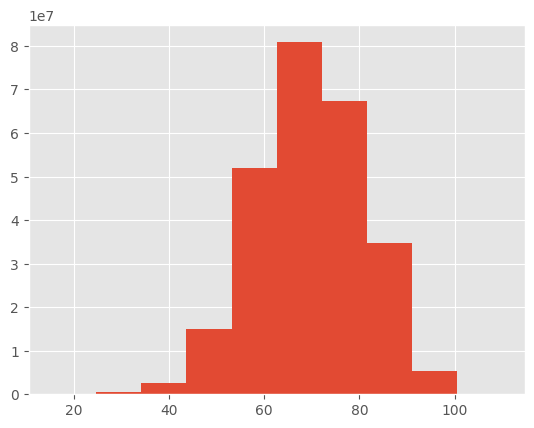

In [17]:
import matplotlib.pyplot as plt
# Histogram for each continuous variable
plt.style.use('ggplot')
plt.hist(lab_train_data["Age at lab test"], bins=10)
plt.show()

* **There are shown outliers for the age ranges of 15–45(appx) and 95–104(appx).Box plot will be used to test that and find outliers in the future.**

# Box plot for Age

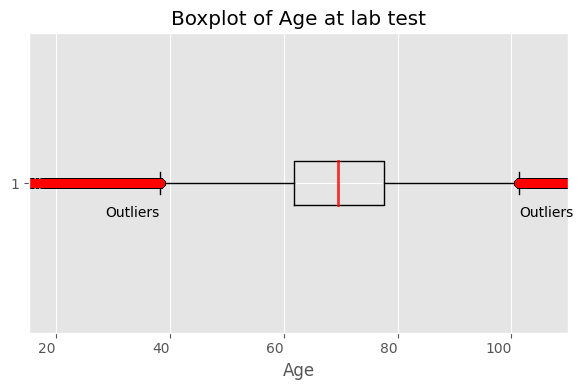

In [18]:
# Assuming you have an 'Age' column in your DataFrame
age = lab_train_data ["Age at lab test"]

# Calculate outliers
q1 = np.percentile(age, 25)
q3 = np.percentile(age, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = age[(age < lower_bound) | (age > upper_bound)]

# Create a boxplot
plt.figure(figsize=(6, 4))
boxplot = plt.boxplot(age, vert=False)

# Plot outliers separately
plt.plot(outliers, [1] * len(outliers), 'ro', markersize=5)
plt.xlabel('Age')
plt.title('Boxplot of Age at lab test')
plt.grid(True)  # Add grid lines

# Set the x-axis limits and ticks
plt.xlim([min(age), max(age)])
plt.xticks(ha='right')

# Annotate the outlier range on the x-axis
plt.text(lower_bound, 0.9, 'Outliers', ha='right', va='center')
plt.text(upper_bound, 0.9, 'Outliers', ha='left', va='center')

# Rotate the image
for box in boxplot['medians']:
    box.set_color('red')  # Set median line color
    box.set_linewidth(2)  # Set median line width
    box.set_alpha(0.8)  # Set median line transparency
    
plt.tight_layout()  # Adjust spacing between elements
plt.show()

* **Ages of less than 36.92 and greater than 100 have been detected as outliers in the,So before giving to the model will handle this before**

**2) Lab test**

In [15]:
lab_train_data["Lab test"].value_counts().loc[lambda x: x>100]

glucose_mg/dl_plasma                            2902195
hct_%_blood                                     2831484
calcium_mg/dl_plasma                            2322255
hgb_g/dl_blood                                  2212000
mcv_fl_no specimen                              2193654
                                                 ...   
plasma cell_%_no specimen                           101
unidentified crystals_null_no specimen              101
cd4/cd8 ratio (bu/cn/sy/bh)_null_no specimen        101
.total volume, 24hr urine_ml_no specimen            101
fibrinogen 1/14/2019_mg/dl_plasma                   101
Name: Lab test, Length: 29618, dtype: int64

* **The most common laboratory tests are "glucose_mg/dl_plasma," "hct_%_blood," and "calcium_mg/dl_plasma" (2322255).(I assume that this is a general lab test.)**

**3) Lab test description** 

In [18]:
lab_train_data["Lab test description"].value_counts().loc[lambda x: x>100]

POTASSIUM                         4933002
CHLORIDE                          4891936
SODIUM                            4849872
GLUCOSE                           4521087
RBC                               4442907
                                   ...   
SED RATE (MINI CUBE)                  101
.INFLUENZA A (PCR)                    101
U-VLDL(CALC)                          101
HOMOCYSTEINE (prior to 1/2/08)        101
U-HDL                                 101
Name: Lab test description, Length: 24056, dtype: int64

**4) Result numeric**

In [19]:
lab_train_data["Result numeric"].nunique()

132304156

* **There are 132304156 distinct lab results displayed.**

In [23]:
lab_train_data["Result numeric"].value_counts().loc[lambda x: x>100]

0.0       4237868
1.0       2485035
4.0       1306837
5.0       1233141
9.0       1221254
           ...   
2237.0        101
2277.0        101
2183.0        101
2217.0        101
2023.0        101
Name: Result numeric, Length: 2220, dtype: int64

**5) Result textual**

In [24]:
lab_train_data["Result textual"].nunique()

42679

* **There are 42679 distinct lab results displayed.**

In [25]:
lab_train_data["Result textual"].value_counts().loc[lambda x: x>100]

NEG                       5703186
NEGATIVE                  4213476
Negative                  2575068
canc                      1227558
[none]                    1168360
                           ...   
>5<20                         101
WILD TYPE (HOMOZYGOUS)        101
YOUNG, PATTINNA               101
REFER                         101
Venous                        101
Name: Result textual, Length: 2244, dtype: int64

* **The most typical lab test textual outcomes are "Neg" (5703186) and "canc" (1227558).**

**6) Result units**

In [26]:
lab_train_data["Result units"].nunique()

3716

* **There are 3716 distinct lab results units displayed.**

In [28]:
lab_train_data["Result units"].value_counts().loc[lambda x: x>100]

mg/dL         40406529
%             36788401
mmol/L        18897772
g/dL          11021019
K/cmm         10887088
                ...   
EIA VALUE          102
cell/uL            101
<150 ng/mL         101
lg10 IU/mL         101
deg                101
Name: Result units, Length: 1416, dtype: int64

* **The most frequent lab test results unite outcomes are "mg/dL" (40406529),"% "(36788401) and "mmol/L" (18897772).**

**7) Specimen source**

In [29]:
lab_train_data["Specimen source"].nunique()

194

* **There are 194 distinct lab test specimen source displayed.**

In [31]:
lab_train_data["Specimen source"].value_counts().loc[lambda x: x>100]

blood                               54485191
plasma                              51632807
serum                               37896367
urine                                2595664
ser/pla                               793782
arterial blood                        278293
blood*                                275863
capillary                             219218
whole blood                           120828
urine random                           78761
blood.                                 73179
feces                                  46676
peritoneal fluid                       36532
capillary blood                        33842
nares                                  23152
blood-c                                22903
platelet poor plasma                   19597
venous blood                           15997
urine, spot                            15681
plas                                   12338
art blood                              12228
nasopharynx                            11687
nasal cavi

* **The most frequent Specimen source is "blood"(54485191),"plasma"(51632807) and "serum"(37896367).**

# Replace NaN values in "Result numeric" with corresponding values from "Result textual"

* **where a certain outcome that is described in the results textual is absent from the results numerical**

In [12]:
# Replace NaN values in "Result numeric" with corresponding values from "Result textual"
lab_train_data['Result'] = lab_train_data['Result numeric'].fillna(lab_train_data['Result textual'])

# Print the updated DataFrame
lab_train_data

,Internalpatientid,Age at lab test,Lab test date,Lab test,Lab test description,Result numeric,Result textual,Result range,Result units,Specimen source,State,Result
0,5166,79.946327,2015-12-10 09:11:04,troponin i (d/c'd 02/02/2014)_ng/ml_plasma,TROPONIN I (d/c'd 02/02/2014),0.020761,None,0.01 - 0.04,ng/ml,plasma,Texas,0.0207611
1,5166,81.160335,2017-02-26 02:27:18,calcium_mg/dl_plasma,calcium,9.759563,None,8.7 - 10.5,mg/dl,plasma,Texas,9.75956
2,5166,81.160335,2017-02-26 02:27:18,sodium_mmol/l_plasma,SODIUM,130.000000,None,136 - 145,mmol/L,plasma,Texas,130
3,5166,81.160335,2017-02-26 02:27:18,creatinine_mg/dl_plasma,CREATININE,1.397398,None,0.6 - 1.3,mg/dl,plasma,Texas,1.3974
4,5166,81.160335,2017-02-26 02:27:18,"protein,total_g/dl_plasma","PROTEIN,TOTAL",7.232604,None,6.2 - 8.0,g/dl,plasma,Texas,7.2326
...,...,...,...,...,...,...,...,...,...,...,...,...
258527310,51662,53.534373,2012-05-07 19:31:20,mono #_k/cu mm_no specimen,MONO #,0.479895,None,.1 - 1,K/cu mm,None,Texas,0.479895
258527311,51662,53.534373,2012-05-07 19:31:20,wbc_k/cu mm_blood,WBC,8.645974,None,4 - 11,K/cu mm,blood,Texas,8.64597
258527312,51662,53.534373,2012-05-07 19:31:20,mch_pg_blood,MCH,29.000000,None,27 - 34,pg,blood,Texas,29
258527313,51662,53.534373,2012-05-07 19:31:20,rdw_%_blood,RDW,12.491520,None,11 - 16,%,blood,Texas,12.4915


In [15]:
# Check for missing or NaN values in the 'Result' column
missing_data = lab_train_data['Result'].isnull().sum()


if missing_data > 0:
    print(f"There are {missing_data} missing or NaN values in the 'Result' column.")
else:
    print("No missing or NaN values found in the 'Result' column.")

There are 106896 missing or NaN values in the 'Result' column.


In [16]:
# Filter the rows with NaN values in the 'Result' column
nan_rows = lab_train_data[lab_train_data['Result'].isnull()]

# Print the rows with NaN values in the 'Result' column
print("Rows with NaN values in the 'Result' column:")
nan_rows.head()

Rows with NaN values in the 'Result' column:


,Internalpatientid,Age at lab test,Lab test date,Lab test,Lab test description,Result numeric,Result textual,Result range,Result units,Specimen source,State,Result
3065,51788,72.858432,2004-08-29 18:09:52,fio2:_null_no specimen,FIO2:,NaN,None,None,None,None,Arizona,None
3368,51791,62.721086,2011-10-08 13:22:13,complete time cbc_time_no specimen,COMPLETE TIME CBC,NaN,None,None,TIME,None,Michigan,None
4874,51800,60.547935,2004-07-14 06:29:21,free testosterone*ne_null_blood,FREE TESTOSTERONE*NE,NaN,None,None,None,blood,Nebraska,None
5981,100002,74.209243,2007-02-01 11:28:50,approved by_null_no specimen,APPROVED BY,NaN,None,None,None,None,Louisiana,None
9828,51684,80.589333,2012-03-27 09:37:40,reference laboratory test_null_no specimen,Reference Laboratory Test,NaN,None,None,None,None,California,None


* **Since both "Result Numeric" and "Result Textual" are absent, we may really consider that value to be empty in the "Result"**( Actual test results are not available for this.)

* Que: How to handle this missing values?

# Adding  'Lab test description' & 'Result (Result numeric & Result textual)' columns with '_'

In [13]:
#In this code, we create a new column called 'Lab test description_Result numeric' by concatenating the values of the 'lab test description' column, underscore ('_'), and the 'lab test results' column
#converted to a string using the `astype(str)` function(because we cant't add differnt dtype)
lab_train_data['Lab test description_Result'] =  lab_train_data['Lab test description'] + '_' +  lab_train_data['Result'].astype(str)

In [14]:
lab_train_data.head(5) # "Lab test description_Result numeric" is the new column created after merging two columns.

,Internalpatientid,Age at lab test,Lab test date,Lab test,Lab test description,Result numeric,Result textual,Result range,Result units,Specimen source,State,Result,Lab test description_Result
0,5166,79.946327,2015-12-10 09:11:04,troponin i (d/c'd 02/02/2014)_ng/ml_plasma,TROPONIN I (d/c'd 02/02/2014),0.020761,None,0.01 - 0.04,ng/ml,plasma,Texas,0.0207611,TROPONIN I (d/c'd 02/02/2014)_0.0207611056423587
1,5166,81.160335,2017-02-26 02:27:18,calcium_mg/dl_plasma,calcium,9.759563,None,8.7 - 10.5,mg/dl,plasma,Texas,9.75956,calcium_9.759563247142873
2,5166,81.160335,2017-02-26 02:27:18,sodium_mmol/l_plasma,SODIUM,130.000000,None,136 - 145,mmol/L,plasma,Texas,130,SODIUM_130.0
3,5166,81.160335,2017-02-26 02:27:18,creatinine_mg/dl_plasma,CREATININE,1.397398,None,0.6 - 1.3,mg/dl,plasma,Texas,1.3974,CREATININE_1.3973984970566211
4,5166,81.160335,2017-02-26 02:27:18,"protein,total_g/dl_plasma","PROTEIN,TOTAL",7.232604,None,6.2 - 8.0,g/dl,plasma,Texas,7.2326,"PROTEIN,TOTAL_7.23260422697443"


# Dropping all unnecessary columns 

* **Based on the analysis, we determine the significance of each column, so we keep those that are providing information that is potentially useful for our specific goal.**

* **Note: Since "Lab test description_Result" has the both lab test and results , will value this feature highly (text data, now relevant NLP).**

* **On top of that, other features are not essential, thus they will be removed.**

In [15]:
# Removeing columns
lab_train_data.drop(['Lab test date', 'Lab test','Lab test description','Result numeric','Result textual',
                     'Result range','Result units','Specimen source','State','Result'], axis=1,inplace=True)

In [16]:
lab_train_data = lab_train_data # giving the variable a name

In [17]:
lab_train_data.head() # Taking the important varible for our task

,Internalpatientid,Age at lab test,Lab test description_Result
0,5166,79.946327,TROPONIN I (d/c'd 02/02/2014)_0.0207611056423587
1,5166,81.160335,calcium_9.759563247142873
2,5166,81.160335,SODIUM_130.0
3,5166,81.160335,CREATININE_1.3973984970566211
4,5166,81.160335,"PROTEIN,TOTAL_7.23260422697443"


In [25]:
# Check for missing or NaN values in the 'Lab test description_Result' column
missing_data = lab_train_data['Lab test description_Result'].isnull().sum()

In [26]:
missing_data 

0

* **Only after the useless columns have been deleted will you be able to see the ones that might include potential attributes to our task.**

# Now Creating the bucket with the various age ranges and adding the "Lab test description_Result numeric" to the particular age range.

In [18]:
df_grouped = lab_train_data.groupby('Internalpatientid',as_index=False).agg(    
    age_at_measurement_max=('Age at lab test','max'),
    age_at_measurement_min=('Age at lab test','min'),
    Measurement=('Lab test description_Result','unique')
    )

In [20]:
df_grouped

,Internalpatientid,age_at_measurement_max,age_at_measurement_min,Measurement
0,1,80.208139,57.839843,"[TOT. BILIRUBIN_1.3418510576392229, CO2_26.0, ..."
1,2,69.529787,48.238772,"[WBC_11.707744269279152, MPV_9.663380784560669..."
2,3,82.283766,78.166309,"[CALCIUM (4/04 - 11/08)_9.99855586847918, GLUC..."
3,4,84.187139,70.280541,"[A1C HGB_10.092643118075156, GLYCO HGB_12.1690..."
4,5,76.507076,73.679830,"[Hgb_15.792592104865944, MONO %_10.2993140918..."
...,...,...,...,...
130440,169060,71.740795,56.932161,"[WBC_10.611946114446155, HEMATOCRIT_49.5798336..."
130441,169061,80.009362,67.263508,"[VIT. D,25-OH, TOTAL(D'CD 1/17)_53.97439779822..."
130442,169062,74.142088,70.280286,"[UREA NITROGEN thru 3/2/2004_12.0, ALKALINE PH..."
130443,169063,76.268058,71.823577,"[ZZCHLORIDE (V2<1/22/07)_94.0, CREATININE (V2<..."


# **Importing the death data*

In [23]:
# from_delimited_files (Create a TabularDataset to represent tabular data in delimited files (e.g. CSV and TSV).

dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'death_train.csv')])

# preview the first 3 rows of the dataset
# dataset.to_pandas_dataframe()

In [24]:
#Converting the dataset into data frame(default as dataset in Azure, thus we must convert the needed formate)
death_train = dataset.to_pandas_dataframe()

In [26]:
death_train

,Column1,Internalpatientid,Age at death,Death date
0,0,100036,72.412770,2015-01-18 20:49:10
1,1,100037,75.241135,2008-10-16 15:14:26
2,2,100045,85.399403,2019-01-26 11:33:52
3,3,100095,84.136551,2004-08-10 21:49:35
4,6,10013,68.372126,2007-06-11 00:17:06
...,...,...,...,...
97279,123343,99827,87.898767,2003-05-13 23:58:55
97280,123344,99842,78.431214,2010-05-25 14:36:27
97281,123345,99847,82.115566,2012-02-20 05:44:33
97282,123347,99872,92.974602,2010-04-18 05:12:36


# **Elimination of the unnamed columns**

In [27]:
# Remove unwanted columns 
death_train.drop('Column1',axis=1,inplace=True)

In [28]:
death_train = death_train

In [29]:
death_train

,Internalpatientid,Age at death,Death date
0,100036,72.412770,2015-01-18 20:49:10
1,100037,75.241135,2008-10-16 15:14:26
2,100045,85.399403,2019-01-26 11:33:52
3,100095,84.136551,2004-08-10 21:49:35
4,10013,68.372126,2007-06-11 00:17:06
...,...,...,...
97279,99827,87.898767,2003-05-13 23:58:55
97280,99842,78.431214,2010-05-25 14:36:27
97281,99847,82.115566,2012-02-20 05:44:33
97282,99872,92.974602,2010-04-18 05:12:36


In [30]:
# Creating the new "death"(1) columns 
death_train['death']=1
death_train.head()

,Internalpatientid,Age at death,Death date,death
0,100036,72.412770,2015-01-18 20:49:10,1
1,100037,75.241135,2008-10-16 15:14:26,1
2,100045,85.399403,2019-01-26 11:33:52,1
3,100095,84.136551,2004-08-10 21:49:35,1
4,10013,68.372126,2007-06-11 00:17:06,1


In [31]:
# Left joint will take all the patients id from df_grouped_condition file and common id from death files
merge_condition_death_left = pd.merge(df_grouped, death_train, how='left',on='Internalpatientid') 

In [32]:
merge_condition_death_left# it will have both death and alive for patients id's for immunization file

,Internalpatientid,age_at_measurement_max,age_at_measurement_min,Measurement,Age at death,Death date,death
0,1,80.208139,57.839843,"[TOT. BILIRUBIN_1.3418510576392229, CO2_26.0, ...",NaN,NaT,NaN
1,2,69.529787,48.238772,"[WBC_11.707744269279152, MPV_9.663380784560669...",NaN,NaT,NaN
2,3,82.283766,78.166309,"[CALCIUM (4/04 - 11/08)_9.99855586847918, GLUC...",82.284691,2005-10-12 01:18:21,1.0
3,4,84.187139,70.280541,"[A1C HGB_10.092643118075156, GLYCO HGB_12.1690...",84.190359,2015-02-24 13:49:53,1.0
4,5,76.507076,73.679830,"[Hgb_15.792592104865944, MONO %_10.2993140918...",76.506124,2004-11-04 23:43:20,1.0
...,...,...,...,...,...,...,...
130440,169060,71.740795,56.932161,"[WBC_10.611946114446155, HEMATOCRIT_49.5798336...",71.832486,2017-10-15 18:34:11,1.0
130441,169061,80.009362,67.263508,"[VIT. D,25-OH, TOTAL(D'CD 1/17)_53.97439779822...",81.975844,2024-02-16 04:06:03,1.0
130442,169062,74.142088,70.280286,"[UREA NITROGEN thru 3/2/2004_12.0, ALKALINE PH...",74.181399,2005-10-14 07:13:53,1.0
130443,169063,76.268058,71.823577,"[ZZCHLORIDE (V2<1/22/07)_94.0, CREATININE (V2<...",78.751284,2006-05-11 14:16:02,1.0


# Now filling the alive patients id's with "0"

In [33]:
merge_condition_death_left['death'] = merge_condition_death_left['death'].fillna(0)

In [34]:
merge_condition_death_left.head() # alive patients are filled with "0"

,Internalpatientid,age_at_measurement_max,age_at_measurement_min,Measurement,Age at death,Death date,death
0,1,80.208139,57.839843,"[TOT. BILIRUBIN_1.3418510576392229, CO2_26.0, ...",NaN,NaT,0.0
1,2,69.529787,48.238772,"[WBC_11.707744269279152, MPV_9.663380784560669...",NaN,NaT,0.0
2,3,82.283766,78.166309,"[CALCIUM (4/04 - 11/08)_9.99855586847918, GLUC...",82.284691,2005-10-12 01:18:21,1.0
3,4,84.187139,70.280541,"[A1C HGB_10.092643118075156, GLYCO HGB_12.1690...",84.190359,2015-02-24 13:49:53,1.0
4,5,76.507076,73.679830,"[Hgb_15.792592104865944, MONO %_10.2993140918...",76.506124,2004-11-04 23:43:20,1.0


# Visualising the dead and alive patients

In [35]:
merge_condition_death_left['death'].value_counts()

1.0    94823
0.0    35622
Name: death, dtype: int64